In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

from mod_my_utils.read_write_data import *

In [2]:
# symbols = ["HDFC", 'RELIANCE', 'TCS', 'HINDUNILVR', 'INFY', 'HDFC', 'BHARTIARTL', 'ITC', 'ASIANPAINT', 'NESTLEIND', 'HCLTECH', 'SBI', 'SBIN']

In [3]:
# symbol = symbols[0]
# data_source = "yahoo"
# # MM/DD/YYYY
# start_date = "1/1/2010"
# end_date = "1/1/2015"
# print(start_date)
# print(end_date)
# print(symbol)

In [4]:
# stock_data = get_price_yahoo(symbol=symbol, data_source=data_source, start_date= start_date, end_date= end_date)

In [5]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

In [6]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [7]:
stock_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2007-12-03,181.86,184.14,177.70,178.8600,34338200.0,0.0,1.0,23.371545,23.664556,22.836927,22.986003,240367400.0
2007-12-04,177.15,180.90,176.99,179.8100,27635700.0,0.0,1.0,22.766244,23.248171,22.745682,23.108091,193449900.0
2007-12-05,182.89,186.00,182.41,185.5000,31871500.0,0.0,1.0,23.503914,23.903592,23.442227,23.839335,223100500.0
2007-12-06,186.19,190.10,186.12,189.9528,32136100.0,0.0,1.0,23.928010,24.430500,23.919014,24.411582,224952700.0
2007-12-07,190.54,194.99,188.04,194.3000,38073800.0,0.0,1.0,24.487046,25.058933,24.165761,24.970258,266516600.0


In [8]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


In [9]:
# data = stock_data[["Adj Close"]].copy()
# data.columns = ["price"]
# data.head(5)

### BB_computation

In [10]:
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


<AxesSubplot:xlabel='Date'>

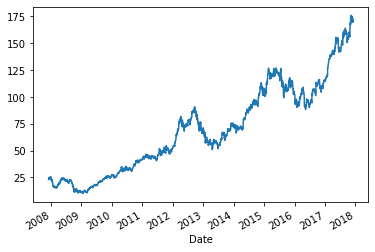

In [11]:
data.price.plot()

In [12]:
data['price'].rolling(window=6).std().head(10)

Date
2007-12-03         NaN
2007-12-04         NaN
2007-12-05         NaN
2007-12-06         NaN
2007-12-07         NaN
2007-12-10    0.879419
2007-12-11    0.709939
2007-12-12    0.435627
2007-12-13    0.297396
2007-12-14    0.290117
Name: price, dtype: float64

In [13]:
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


- middle_band
- lower_band = middle_band - 2 * std
- upper_band = middle_band + 2 * std

In [15]:
data['middle_band'] = data['price'].rolling(20).mean()
data.head(30)

,price,middle_band
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,NaN
2007-12-05,23.839335,NaN
2007-12-06,24.411582,NaN
2007-12-07,24.970258,NaN
2007-12-10,24.958692,NaN
2007-12-11,24.230069,NaN
2007-12-12,24.528170,NaN
2007-12-13,24.652829,NaN


In [16]:
data['std'] = data['price'].rolling(20).std()
data.head(30)

,price,middle_band,std
Date,,,
2007-12-03,22.986003,NaN,NaN
2007-12-04,23.108091,NaN,NaN
2007-12-05,23.839335,NaN,NaN
2007-12-06,24.411582,NaN,NaN
2007-12-07,24.970258,NaN,NaN
2007-12-10,24.958692,NaN,NaN
2007-12-11,24.230069,NaN,NaN
2007-12-12,24.528170,NaN,NaN
2007-12-13,24.652829,NaN,NaN


In [17]:
data['upper_band'] = data['middle_band'] + 2 * data['std']
data['lower_band'] = data['middle_band'] - 2 * data['std']
data.head(30)

,price,middle_band,std,upper_band,lower_band
Date,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,NaN
2007-12-04,23.108091,NaN,NaN,NaN,NaN
2007-12-05,23.839335,NaN,NaN,NaN,NaN
2007-12-06,24.411582,NaN,NaN,NaN,NaN
2007-12-07,24.970258,NaN,NaN,NaN,NaN
2007-12-10,24.958692,NaN,NaN,NaN,NaN
2007-12-11,24.230069,NaN,NaN,NaN,NaN
2007-12-12,24.528170,NaN,NaN,NaN,NaN
2007-12-13,24.652829,NaN,NaN,NaN,NaN


In [18]:
bb_data = pd.DataFrame(index=data.index)
bb_data.head()
bb_data['price'] = data['price']

In [19]:
def get_bb_values(data, period = 20, std = 2):
    """
    Method to get bollinger band value with, middle, upper and lower band
    Input: 
    data: data frame with price
    period: moving window for middle band
    std: standard deviatioin for upper and lower band
    Output:
    data frame with price,  middle, uppper, lower band
    """
    bb_data = pd.DataFrame(index=data.index)
    bb_data['price'] = data['price']
    
    bb_data['middleband']=bb_data['price'].rolling(window=period).mean()
    bb_data['upperband']=bb_data['middleband'] + std * (bb_data['price'].rolling(window=period).std())
    bb_data['lowerband']=bb_data['middleband'] - std * (bb_data['price'].rolling(window=period).std())
    return bb_data


In [20]:
bb = get_bb_values(data)

In [21]:
bb

,price,middleband,upperband,lowerband
Date,,,,
2007-12-03,22.986003,NaN,NaN,NaN
2007-12-04,23.108091,NaN,NaN,NaN
2007-12-05,23.839335,NaN,NaN,NaN
2007-12-06,24.411582,NaN,NaN,NaN
2007-12-07,24.970258,NaN,NaN,NaN
...,...,...,...,...
2017-11-27,174.090000,171.4350,178.414671,164.455329
2017-11-28,173.070000,171.9360,177.717005,166.154995
2017-11-29,169.480000,172.0740,177.448197,166.699803


In [22]:
bb.head()

,price,middleband,upperband,lowerband
Date,,,,
2007-12-03,22.986003,NaN,NaN,NaN
2007-12-04,23.108091,NaN,NaN,NaN
2007-12-05,23.839335,NaN,NaN,NaN
2007-12-06,24.411582,NaN,NaN,NaN
2007-12-07,24.970258,NaN,NaN,NaN


In [23]:
bb = get_bb_values(data, period=100, std=3)

### BB Plot

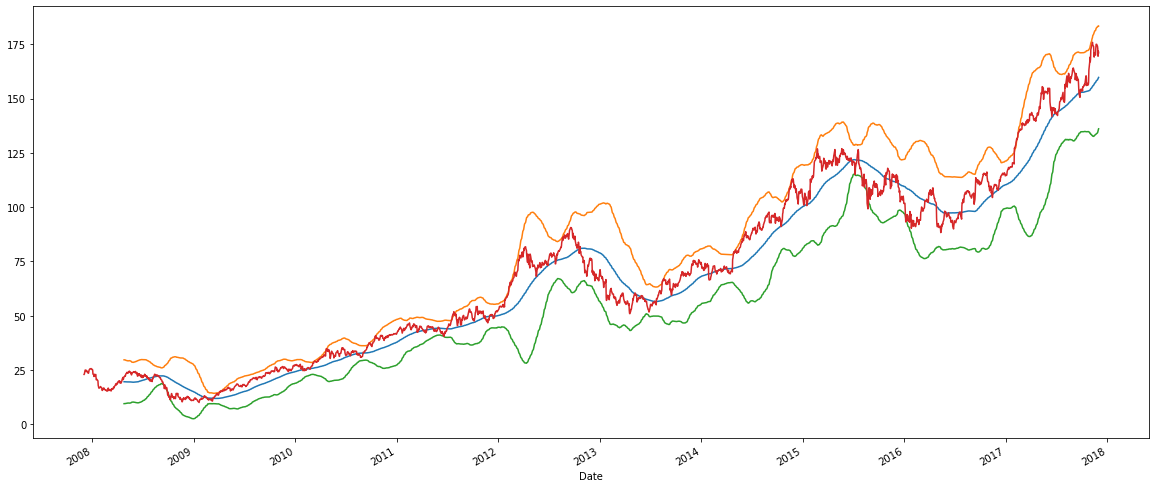

In [27]:
graph = plt.figure(figsize=(20,30))
g1 = graph.add_subplot(311)
bb['middleband'].plot(ax=g1)
bb['upperband'].plot(ax=g1)
bb['lowerband'].plot(ax=g1)
bb['price'].plot(ax=g1)
plt.show()

In [28]:
def get_bb_plot(bb):
    graph = plt.figure(figsize=(20,30))
    g1 = graph.add_subplot(311)
    bb['middleband'].plot(ax=g1)
    bb['upperband'].plot(ax=g1)
    bb['lowerband'].plot(ax=g1)
    bb['price'].plot(ax=g1)
    plt.show()

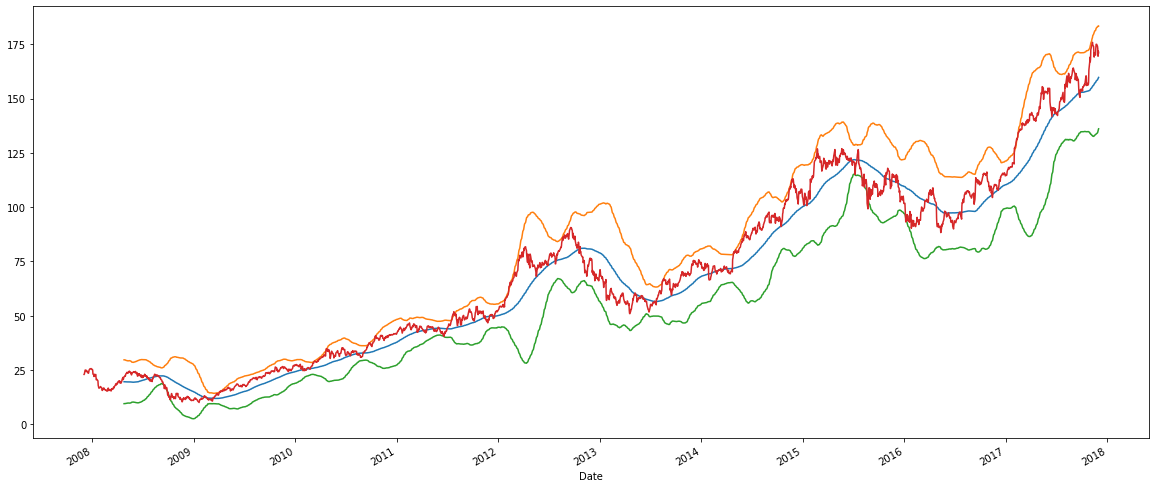

In [29]:
get_bb_plot(bb)

### Get BB Signals

In [30]:
bb.head()

,price,middleband,upperband,lowerband
Date,,,,
2007-12-03,22.986003,NaN,NaN,NaN
2007-12-04,23.108091,NaN,NaN,NaN
2007-12-05,23.839335,NaN,NaN,NaN
2007-12-06,24.411582,NaN,NaN,NaN
2007-12-07,24.970258,NaN,NaN,NaN


In [31]:
period = 100
signals = pd.DataFrame(index=bb.index)
signals['price'] = bb['price']
signals['sell']= 0.0
signals['buy']= 0.0
signals['buy'][period:] = np.where(bb['price'][period:] < bb['lowerband'][period:], -1.0, 0.0)
signals['sell'][period:] = np.where(bb['price'][period:] > bb['upperband'][period:],1.0,0)
signals['buy'] = signals['buy'].diff()
signals['sell'] = signals['sell'].diff()
signals.loc[signals['buy'] == -1.0,['buy']]=0 
signals.loc[signals['sell'] == 1.0,['sell']]=0 
signals['buy_sell'] = signals['buy'] + signals['sell']
signals.tail()

,price,sell,buy,buy_sell
Date,,,,
2017-11-27,174.09,0.0,0.0,0.0
2017-11-28,173.07,0.0,0.0,0.0
2017-11-29,169.48,0.0,0.0,0.0
2017-11-30,171.85,0.0,0.0,0.0
2017-12-01,171.05,0.0,0.0,0.0


<AxesSubplot:xlabel='Date'>

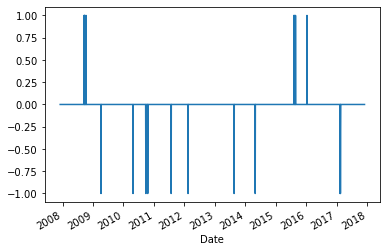

In [32]:
signals.buy_sell.plot()

In [33]:
def get_bb_signal(bb, period = 20):
    """
    Bollinger Band buy sell signal calculation
    Input: 
    data: data frame with price, lowerband, upperband
    Output:
    Data frame with buy sell signal
    """
    signals = pd.DataFrame(index=bb.index)
    signals.head()
    signals['price'] = bb['price']
    signals['sell']= 0.0
    signals['buy']= 0.0
    signals['buy'][period:] = np.where(bb['price'][period:] < bb['lowerband'][period:], -1.0, 0.0)
    signals['sell'][period:] = np.where(bb['price'][period:] > bb['upperband'][period:],1.0,0)
    signals['buy'] = signals['buy'].diff()
    signals['sell'] = signals['sell'].diff()
    signals.loc[signals['buy'] == -1.0,['buy']]=0 
    signals.loc[signals['sell'] == 1.0,['sell']]=0 
    signals['buy_sell'] = signals['buy'] + signals['sell']
    return signals[['price', 'buy_sell']]


In [34]:
signals = get_bb_signal(bb)

In [35]:
signals.head()

,price,buy_sell
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,0.0
2007-12-05,23.839335,0.0
2007-12-06,24.411582,0.0
2007-12-07,24.970258,0.0


<AxesSubplot:xlabel='Date'>

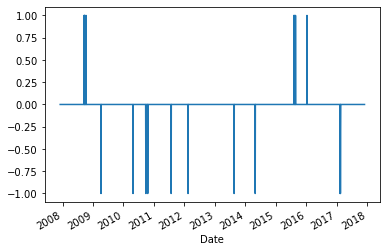

In [36]:
signals.buy_sell.plot()

### BB plot

In [37]:
def plot_bb_buy_sell(bb, signals):
    """
    Plot price, Bollinger band middle, lower, upper band with buy and sell signal
    """
    graph = plt.figure(figsize=(20,5))
    ax1 = graph.add_subplot(111)
    bb[['price','lowerband','upperband']].plot(ax = ax1,title ='Bollinger band Signals')
    ax1.plot(signals.loc[signals.buy_sell == 1].index, signals.price[signals.buy_sell == 1], "^", markersize = 12, color = "g")
    ax1.plot(signals.loc[signals.buy_sell == -1].index, signals.price[signals.buy_sell == -1], "v", markersize = 12, color = "m")
    # plt.show()
    plt.show()

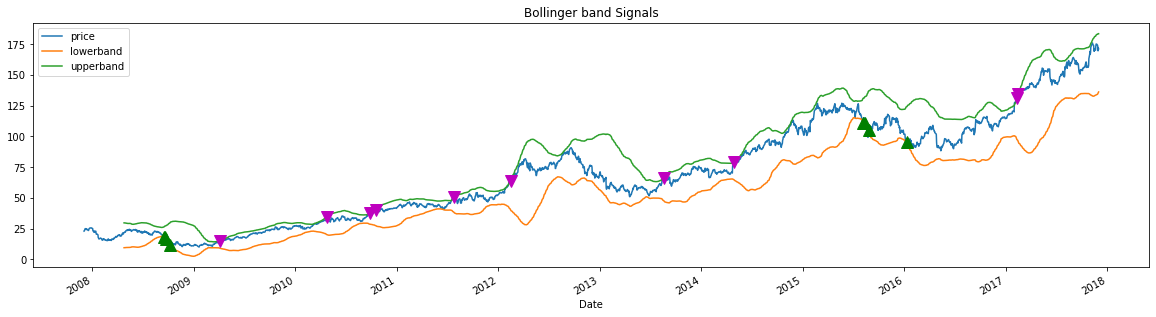

In [38]:
plot_bb_buy_sell(bb, signals)